In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression
from cost import compute_loss

### Load train and test data

In [3]:
# Data paths
DATA_TRAIN_PATH = "../data/train.csv"

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [4]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [5]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 2
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 0

In [6]:
# get train and test data
train_index = jet_train_samples[0]
x, y = X[train_index], Y[train_index]

### Best degree

In [8]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            
            x_tr_clean,x_val_clean = clean_data(x_train, x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))
        

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 81.6782101582726 81.6438465849948
2 82.56966130194571 82.52362078629193
3 82.96167293885286 82.96100568500279
4 83.33066431793311 83.28829369845464
5 83.70632823551392 83.68864600848747
6 83.8207622707983 83.78673232444552
7 83.96789174473537 83.90283449435503
8 84.27416126191048 84.19509168067898
9 82.77384098006246 82.7718392185123
10 84.23212426935703 84.20309872687966
11 83.92985827528226 83.88782128272881
12 84.30151866976271 84.31019296981344
13 78.83704326473963 78.80034430298663
14 79.81190113966957 79.74217311233886
15 78.97750020017615 78.82636720313876
16 70.45533402727733 70.36892465369525
17 74.5439319934876 74.41348386580191
18 72.46677075826727 72.54684122027385
19 75.45306536418715 75.2842501401233


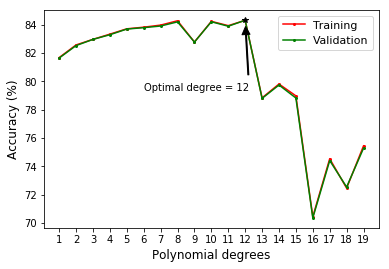

In [13]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-6, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group0.eps")
plt.show()

### Best lambda

In [15]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,x_val_clean = clean_data(x_train, x_val)
            
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1e-08 78.68224037152694 78.68724477540235
1e-07 83.5438519230256 83.45043638401793
1e-06 84.30285317746284 84.21210665385539
1e-05 84.44064109749914 84.34822643926655
0.0001 84.47233565537672 84.40827928577147
0.001 84.30151866976271 84.31019296981344
0.01 78.92211813062161 79.02354071582992


In [ ]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-2),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group0.eps")
plt.show()